<a href="https://colab.research.google.com/github/nadinne94/testes_de_hipotese/blob/main/TesteDeHipoteses_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Data Analytics 2024 | Challenge Teste de Hipóteses | Individual**

 ## **Base de dados experimento_test_ab.csv**

### **Bibliotecas e leitura da base**

In [ ]:
# bibliotecas base
import pandas as pd
import numpy as np

# bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas para estatística
import scipy.stats as stat
from scipy import stats
import math

# biblioteca para verificar assimetria
from scipy.stats import skew

In [ ]:
#Base de dados
df_experimento = pd.read_csv("experimento_teste_ab.csv")
df_experimento

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0
...,...,...,...,...
1995,1996,B,120,0
1996,1997,B,182,0
1997,1998,B,197,0
1998,1999,B,122,0


In [ ]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
df_experimento.duplicated().sum()

0

### 1.	Qual dos cenários tem a maior taxa de conversão?

In [ ]:
# Calculando a taxa de conversão para cada versão da página
taxa_conversao_A = df_experimento[df_experimento['Versão_Página'] == 'A']['Conversões'].mean()
taxa_conversao_B = df_experimento[df_experimento['Versão_Página'] == 'B']['Conversões'].mean()

# Comparando as taxas de conversão
if taxa_conversao_A > taxa_conversao_B:
    print("A versão da página A tem a maior taxa de conversão.")
elif taxa_conversao_A < taxa_conversao_B:
    print("A versão da página B tem a maior taxa de conversão.")
else:
    print("As versões da página A e B têm a mesma taxa de conversão.")

A versão da página B tem a maior taxa de conversão.


### 2.	Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

#### a.	O cenário A, da base, como o inicial, que funciona hoje.

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Média e desvio padrão do cenário A (base atual)
media_A = df_experimento[df_experimento['Versão_Página'] == 'A']['Conversões'].mean()
desvio_padrao_A = df_experimento[df_experimento['Versão_Página'] == 'A']['Conversões'].std()

# Suponha que queremos detectar uma diferença mínima de 0.05 na taxa de conversão
diferenca_minima = 0.05

# Nível de significância (alfa) - vamos usar 0.05, o que significa 95% de confiança
alfa = 0.05

# Poder do teste (1 - beta) - vamos usar 0.8, o que significa 80% de poder
poder = 0.8

# Calculando o tamanho da amostra usando TTestIndPower
effect_size = diferenca_minima / desvio_padrao_A
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alfa, power=poder, alternative='larger')

print("Tamanho da amostra necessário:", np.ceil(sample_size))

Tamanho da amostra necessário: 466.0


#### b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

In [ ]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import NormalIndPower

# Definindo os parâmetros
alpha = 0.05  # Nível de significância
power = 0.95  # Confiança de 95%
proporcao_A = df_experimento[df_experimento['Versão_Página'] == 'A']['Conversões'].mean()
proporcao_B = df_experimento[df_experimento['Versão_Página'] == 'B']['Conversões'].mean()
effect_size = proportion_effectsize(proporcao_A, proporcao_B)

# Calculando o tamanho da amostra usando NormalIndPower
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Tamanho da amostra necessário:", sample_size)

Tamanho da amostra necessário: 6601.030712051978


#### c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.

In [ ]:
# Definindo os parâmetros
alpha = 0.05  # Nível de significância
power = 0.80  # Certeza de 80%

# Calculando o tamanho da amostra usando NormalIndPower
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Tamanho da amostra necessário:", sample_size)

Tamanho da amostra necessário: 3987.0511066576364


#### d. O aumento para 10% de conversão.

In [ ]:
effect_size = proportion_effectsize(proporcao_A, proporcao_B + 0.10)  # Aumento para 10% de conversão

# Calculando o tamanho da amostra usando NormalIndPower
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

print("Tamanho da amostra necessário:", sample_size)

Tamanho da amostra necessário: 145.51639687614914


## **Pacientes**

Verifique a base pacientes.csv, os dados são fictícios. A mesma sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

In [ ]:
df_pacientes = pd.read_csv('pacientes.csv')
df_pacientes

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais
...,...,...,...,...,...,...,...,...,...
995,995,136.381404,58,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
996,996,161.801012,41,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
997,997,134.390624,70,0,0,0,Masculino,Caucasiano,Saudável
998,998,160.818609,33,1,0,0,Feminino,Caucasiano,Saudável


In [ ]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
df_pacientes.duplicated().sum()

0

In [ ]:
# Renomear a coluna 'Unnamed: 0' para 'Index' e definir como índice
df_pacientes.set_index(df_pacientes['Unnamed: 0'].rename('Index'), inplace=True)

# Agora você pode remover a coluna 'Unnamed: 0' se desejar
df_pacientes.drop(columns=['Unnamed: 0'], inplace=True)
df_pacientes

,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
Index,,,,,,,,
0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais
...,...,...,...,...,...,...,...,...
995,136.381404,58,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
996,161.801012,41,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
997,134.390624,70,0,0,0,Masculino,Caucasiano,Saudável


### 3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

- Hipótese nula (H0): A idade média das pessoas com problemas cardíacos é igual ou menor que 50 anos.
- Hipótese alternativa (H1): A idade média das pessoas com problemas cardíacos é maior que 50 anos.

In [ ]:
# Amostra de índices
indices_amostra = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756,
           358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
           146, 505, 273, 957, 362]

# Tamanho da amostra
tamanho_amostra = len(indices_amostra)
print('Tamanho da amostra:', tamanho_amostra)

# Selecionando as idades dos pacientes com problemas cardíacos
idades_problemas_cardiacos = df_pacientes.loc[indices_amostra, 'Idade']

# Média e desvio padrão da amostra
media_amostra = idades_problemas_cardiacos.mean()
print('Mean:',media_amostra)
desvio_padrao_amostra = idades_problemas_cardiacos.std()
print('Std:', desvio_padrao_amostra)


Tamanho da amostra: 45
Mean: 50.08888888888889
Std: 11.40538593309443


verificando a normalidade

In [ ]:
print(idades_problemas_cardiacos.mean())
print(idades_problemas_cardiacos.median())
print(idades_problemas_cardiacos.mode())

50.08888888888889
49.0
0    41
Name: Idade, dtype: int64


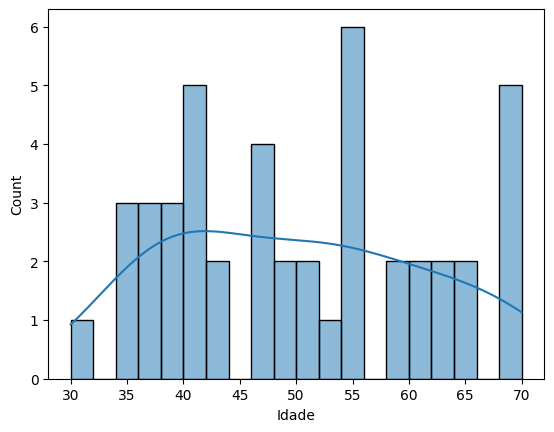

In [ ]:
sns.histplot(idades_problemas_cardiacos, bins=20, kde=True)
plt.show()

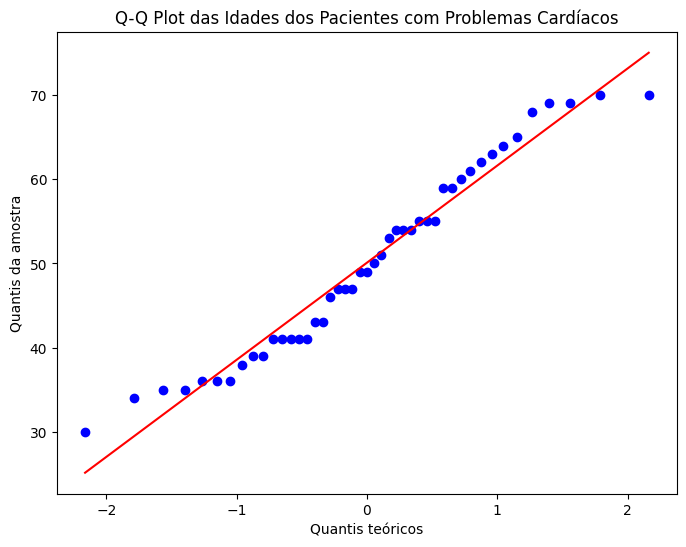

Resultado do teste de Shapiro-Wilk:
Estatística de teste: 0.9530667066574097
Valor p: 0.06641168147325516


In [ ]:
# Teste de Shapiro-Wilk
stat_shapiro, p_valor_shapiro = stats.shapiro(idades_problemas_cardiacos)

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(idades_problemas_cardiacos, dist="norm", plot=plt)
plt.title('Q-Q Plot das Idades dos Pacientes com Problemas Cardíacos')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis da amostra')
plt.show()

# Exibir resultado do teste de Shapiro-Wilk
print("Resultado do teste de Shapiro-Wilk:")
print("Estatística de teste:", stat_shapiro)
print("Valor p:", p_valor_shapiro)

In [ ]:
media_hipotetica = 50

# Calculando o valor t e o valor p
valor_t, valor_p = stats.ttest_1samp(idades_problemas_cardiacos, media_hipotetica, alternative='greater')
print('Valor t:', valor_t)
print('Valor p:', valor_p)

# Nível de significância
alpha = 0.05

# Teste de rejeição da hipótese nula
if valor_p > alpha:
  print('Não rejeita-se a hipotése nula de que a idade média das pessoas com problemas cardíacos é igual ou menor que 50 anos.')
else:
  print('Rejeita-se a hipotése nula. A idade média das pessoas com problemas cardíacos é maior que 50 anos.')

Valor t: 0.052280983519350496
Valor p: 0.4792707233816392
Não rejeita-se a hipotése nula de que a idade média das pessoas com problemas cardíacos é igual ou menor que 50 anos.


###4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

Para determinar se a divisão dos conjuntos em pessoas com condições de saúde adicionais e pessoas saudáveis resultaria em amostras dependentes ou independentes, precisamos considerar como os indivíduos foram selecionados e se há alguma interação entre eles.

Se cada indivíduo estiver presente em ambos os conjuntos (ou seja, cada pessoa está representada em ambas as categorias: com condições de saúde adicionais e saudáveis), as amostras seriam consideradas dependentes. Isso ocorre porque as observações em uma categoria estão relacionadas diretamente às observações na outra categoria, já que são as mesmas pessoas sendo observadas em diferentes estados de saúde.

Por outro lado, se os indivíduos em uma categoria não tiverem relação direta com os indivíduos na outra categoria (ou seja, cada pessoa está presente apenas em um dos conjuntos, mas não em ambos), então as amostras seriam consideradas independentes.

Portanto, a natureza das amostras (dependentes ou independentes) depende de como os dados foram coletados e organizados em relação à presença ou ausência de cada indivíduo em diferentes categorias.

###5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.


In [ ]:
# Dados fornecidos
indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Selecionando a pressão arterial para os pacientes com condições de saúde adicionais
pressao_adicional = df_pacientes.loc[indices, 'Pressao_Arterial']

# Selecionando a pressão arterial para os pacientes saudáveis
indices_saudaveis = df_pacientes[df_pacientes['Estado_Saude'] == 0].index
pressao_saudavel = df_pacientes.loc[indices_saudaveis, 'Pressao_Arterial']

# Calculando a média da pressão arterial para cada grupo
media_pressao_adicional = pressao_adicional.mean()
media_pressao_saudavel = pressao_saudavel.mean()

# Exibir as médias calculadas
print("Pressão arterial média para pacientes com condições de saúde adicionais:", media_pressao_adicional)
print("Pressão arterial média para pacientes sem condições adicionais de saúde:", media_pressao_saudavel)

Pressão arterial média para pacientes com condições de saúde adicionais: 153.08970714151184
Pressão arterial média para pacientes sem condições adicionais de saúde: 150.64329004794322


In [ ]:
# Teste t de duas amostras
valor_t, valor_p = stats.ttest_ind(pressao_adicional, pressao_saudavel, equal_var=False)

# Nível de significância
alpha = 0.06

print("Valor p associado ao teste t de duas amostras:", valor_p)

# Verificando se rejeitamos ou não a hipótese nula
if valor_p < alpha:
    print("Rejeitamos a hipótese nula. Há evidências estatísticas de diferença na média da pressão arterial entre os dois grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências estatísticas suficientes para afirmar que a média da pressão arterial difere entre os dois grupos.")


Valor p associado ao teste t de duas amostras: 0.13108954823199845
Não rejeitamos a hipótese nula. Não há evidências estatísticas suficientes para afirmar que a média da pressão arterial difere entre os dois grupos.


### 6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
a. Hipótese Nula (H0 ): A pressão arterial média é a mesma em todos os grupos étnicos.

b. Hipótese Alternativa (H1 ): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

In [ ]:
# Separando os dados de pressão arterial para cada grupo étnico
pressao_afro_americano = df_pacientes[df_pacientes['Nome_Etnia'] == 'Afro-americano']['Pressao_Arterial']
pressao_asian = df_pacientes[df_pacientes['Nome_Etnia'] == 'Asiático']['Pressao_Arterial']
pressao_hispanico = df_pacientes[df_pacientes['Nome_Etnia'] == 'Hispânico']['Pressao_Arterial']
pressao_caucasiano = df_pacientes[df_pacientes['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']

# Realizando o teste ANOVA
valor_f, valor_p = stats.f_oneway(pressao_afro_americano, pressao_asian, pressao_hispanico, pressao_caucasiano)

# Nível de significância
alpha = 0.05

# Exibindo os resultados
print("Valor p associado ao teste ANOVA:", valor_p)

# Verificando se rejeitamos ou não a hipótese nula
if valor_p < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.")


Valor p associado ao teste ANOVA: 0.873800123850745
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.


### 7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)


In [ ]:
# Criando uma tabela de contingência com as variáveis sexo e estado de saúde
tabela_contingencia = pd.crosstab(df_pacientes['Nome_Genero'], df_pacientes['Nome_Estado_Saude'])
tabela_contingencia

Nome_Estado_Saude,Com condições de saúde adicionais,Saudável
Nome_Genero,,
Feminino,257,246
Masculino,253,244


In [ ]:
# Realizando o teste qui-quadrado de independência
qui_quadrado, valor_p, graus_liberdade, _ = stats.chi2_contingency(tabela_contingencia)

# Nível de significância
alpha = 0.05

# Exibindo os resultados
print("Estatística Qui-quadrado:", qui_quadrado)
print("Valor p associado ao teste qui-quadrado:", valor_p)
print("Graus de liberdade:", graus_liberdade)

# Verificando se rejeitamos ou não a hipótese nula
if valor_p < alpha:
    print("Rejeitamos a hipótese nula. Existe uma associação significativa entre o sexo e as condições de saúde adicionais.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma associação significativa entre o sexo e as condições de saúde adicionais.")


Estatística Qui-quadrado: 0.0
Valor p associado ao teste qui-quadrado: 1.0
Graus de liberdade: 1
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma associação significativa entre o sexo e as condições de saúde adicionais.


### 8. Existe uma associação entre a idade dos pacientes e sua pressão arterial?

a. Hipótese Nula (H0 ): A idade dos pacientes é independente da pressão arterial.

b. Hipótese Alternativa (H1 ): A idade dos pacientes está associada à sua pressão arterial.



In [ ]:
# Calculando a correlação de Pearson entre idade dos pacientes e pressão arterial
correlacao, valor_p = stats.pearsonr(df_pacientes['Idade'], df_pacientes['Pressao_Arterial'])

# Nível de significância
alpha = 0.05

# Exibindo os resultados
print("Correlação de Pearson entre idade dos pacientes e pressão arterial:", correlacao)
print("Valor p associado à correlação de Pearson:", valor_p)

# Verificando se rejeitamos ou não a hipótese nula
if valor_p < alpha:
    print("Rejeitamos a hipótese nula. A idade dos pacientes está associada à sua pressão arterial.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a idade dos pacientes está associada à sua pressão arterial.")


Correlação de Pearson entre idade dos pacientes e pressão arterial: -0.021385356934648977
Valor p associado à correlação de Pearson: 0.4993608212055476
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a idade dos pacientes está associada à sua pressão arterial.


### 9. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)


In [ ]:
# Selecionando a pressão arterial dos pacientes com condições de saúde adicionais
pressao_condicoes_adicionais = df_pacientes[df_pacientes['Estado_Saude'] == 1]['Pressao_Arterial']

# Calculando a média e o desvio padrão da pressão arterial para pacientes com condições de saúde adicionais
media_pressao_condicoes_adicionais = pressao_condicoes_adicionais.mean()
desvio_padrao_pressao_condicoes_adicionais = pressao_condicoes_adicionais.std()

# Tamanho da amostra
tamanho_amostra = len(pressao_condicoes_adicionais)

# Nível de confiança
nivel_confianca = 0.95

# Valor crítico da distribuição normal padrão para o nível de confiança desejado
z = stats.norm.ppf(1 - (1 - nivel_confianca) / 2)

# Calculando o intervalo de confiança para a média da pressão arterial
erro_padrao_media = desvio_padrao_pressao_condicoes_adicionais / np.sqrt(tamanho_amostra)
intervalo_confianca = z * erro_padrao_media

# Intervalo de confiança
limite_inferior = media_pressao_condicoes_adicionais - intervalo_confianca
limite_superior = media_pressao_condicoes_adicionais + intervalo_confianca

# Exibindo os resultados
print("Intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais (95% de confiança):")
print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)

Intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais (95% de confiança):
Limite Inferior: 149.22186145551754
Limite Superior: 151.01504243479755


### 10. A distribuição da pressão arterial na população segue uma distribuição normal?

a. Hipótese Nula (H0 ): A distribuição da pressão arterial na população segue uma distribuição normal.

b. Hipótese Alternativa (H1 ): A distribuição da pressão arterial na população não segue uma distribuição normal.

In [ ]:
# Realizando o teste de Shapiro-Wilk para verificar a normalidade da distribuição da pressão arterial
stat_shapiro, p_valor_shapiro = stats.shapiro(df_pacientes['Pressao_Arterial'])

# Nível de significância
alpha = 0.05

# Exibindo os resultados
print("Resultado do teste de Shapiro-Wilk:")
print("Estatística de teste:", stat_shapiro)
print("Valor p:", p_valor_shapiro)

# Verificando se rejeitamos ou não a hipótese nula
if p_valor_shapiro < alpha:
    print("Rejeitamos a hipótese nula. A distribuição da pressão arterial na população não segue uma distribuição normal.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a distribuição da pressão arterial na população não segue uma distribuição normal.")


Resultado do teste de Shapiro-Wilk:
Estatística de teste: 0.9970362186431885
Valor p: 0.06068389490246773
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a distribuição da pressão arterial na população não segue uma distribuição normal.
